<div style='float:left'>
<img style="-webkit-user-select: none" src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/marca_UOC_web.jpg">
<h1>
B2.332-A1.C50.R_Creación de un árbol de decisión con el algoritmo C5.0
</h1>

## Descripción:

### En este ejemplo se muestra como generar un árbol C5.0 con opciones básicas

## Procedimiento:

### Instalar los packages necesarios en caso de no haberlo hecho anteriormente

In [2]:
if(!require(C50)){
    install.packages('C50',repos='http://cran.es.r-project.org')
    require(C50)
}
set.seed(5813)

Loading required package: C50


## Carga de los datos. 

In [3]:
Alumnos_usos_sociales <-read.csv("B2.332_Students.csv",comment.char = "#")
# Reordenar al azar los datos
Alumnos_usos_sociales <- Alumnos_usos_sociales[sample(nrow(Alumnos_usos_sociales)),]
# Visualizamos el resultado 
head(Alumnos_usos_sociales)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Supera
225,GP,F,19,U,GT3,T,Secundaria,Secundaria,other,other,...,3,3,1,2,3,4,12,12,12,Si
81,GP,M,15,U,GT3,T,Grado_9,Secundaria,other,services,...,2,2,1,3,3,0,11,11,12,Si
916,GP,M,17,U,GT3,T,Secundaria,Primaria_Superior,services,other,...,4,4,3,4,5,2,9,9,10,Si
908,GP,M,18,U,GT3,T,Grado_9,Primaria_Superior,other,other,...,2,4,1,2,4,8,15,14,14,Si
211,GP,M,17,U,GT3,T,Superior,Superior,services,teacher,...,2,3,1,2,5,4,13,13,14,Si
50,GP,F,15,U,GT3,T,Superior,Superior,services,teacher,...,4,4,1,1,3,2,13,12,12,Si


### Preparamos los datos para crear el modelo y particionamos el conjunto de entrada en dos (training y test set) 

In [4]:
# Asignamos a X las variables para construir el arbol
X <- Alumnos_usos_sociales[,c("sex","age","studytime","failures","schoolsup","famsup","absences")]
head(X)

# Asignamos a Y si supera o no el curso
Y <- Alumnos_usos_sociales[,34]

# conjunto de entreno
trainX <- X[1:731,]
trainY <- Y[1:731]
# conjunto de test
testX <- X[732:1044,]
testY <- Y[732:1044]


,sex,age,studytime,failures,schoolsup,famsup,absences
225,F,19,Sup. 10h.,0,no,yes,4
81,M,15,Inf. a 2h,0,yes,yes,0
916,M,17,De 2h a 5h,0,no,no,2
908,M,18,De 2h a 5h,0,no,no,8
211,M,17,Inf. a 2h,0,no,no,4
50,F,15,De 2h a 5h,0,yes,yes,2


### Creamos un primer modelo de árbol. Extraemos el modelo en formato texto

In [5]:
# Generamos el modelo y observamos el resultado
model <- C50::C5.0(trainX,trainY)
summary(model)


Call:
C5.0.default(x = trainX, y = trainY)


C5.0 [Release 2.07 GPL Edition]  	Tue Apr 25 19:23:25 2017
-------------------------------

Class specified by attribute `outcome'

Read 731 cases (8 attributes) from undefined.data

Decision tree:

failures <= 0:
:...absences <= 13: Si (584/67)
:   absences > 13:
:   :...absences > 22: No (4)
:       absences <= 22:
:       :...sex = F: Si (11/1)
:           sex = M: No (13/5)
failures > 0:
:...schoolsup = yes: Si (12/3)
    schoolsup = no:
    :...studytime in {De 5h a 10h,Sup. 10h.}: No (13/6)
        studytime = De 2h a 5h:
        :...sex = F: No (22/6)
        :   sex = M: Si (21/7)
        studytime = Inf. a 2h:
        :...absences <= 3: No (23/3)
            absences > 3:
            :...sex = F: Si (11/4)
                sex = M: No (17/5)


Evaluation on training data (731 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	    11  107(14.6%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	    67  

### Creamos un segundo modelo de árbol. Extraemos el modelo en formato texto y gráfico.


Call:
C5.0.default(x = trainX, y = trainY)


C5.0 [Release 2.07 GPL Edition]  	Tue Apr 25 19:23:25 2017
-------------------------------

Class specified by attribute `outcome'

Read 800 cases (6 attributes) from undefined.data

Decision tree:

failures <= 0: Si (667/91)
failures > 0:
:...failures > 2: No (18/3)
    failures <= 2:
    :...schoolsup = no: No (101/43)
        schoolsup = yes: Si (14/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     4  141(17.6%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	    73    95    (a): class No
	    46   586    (b): class Si


	Attribute usage:

	100.00%	failures
	 14.38%	schoolsup


Time: 0.0 secs


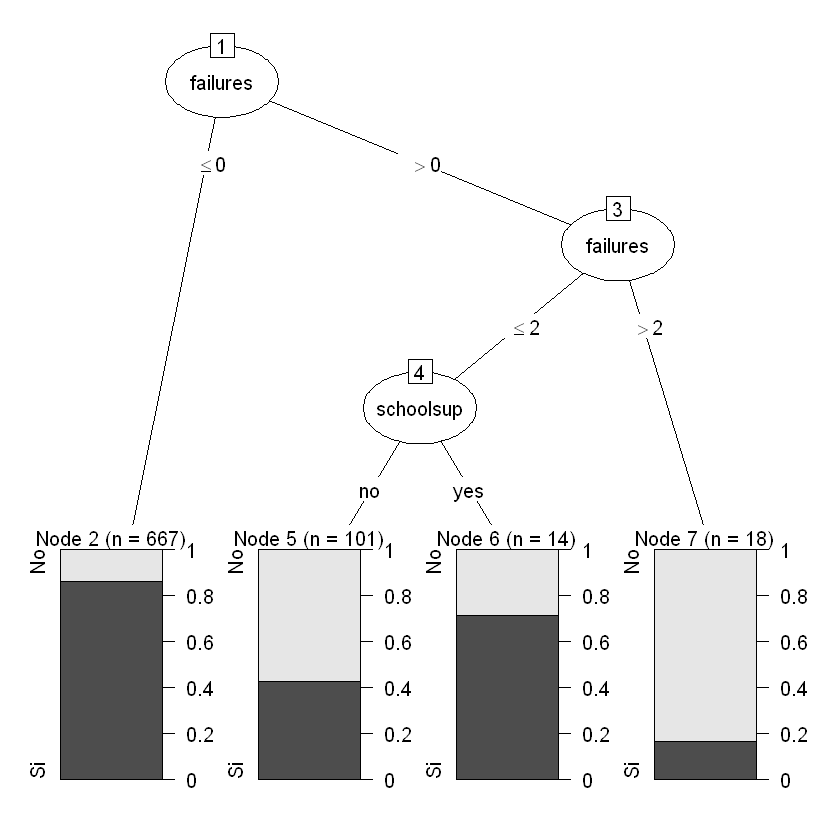

In [6]:
# Redefinimos X
X <- Alumnos_usos_sociales[,c("sex","age","studytime","failures","schoolsup")]
# Redefinimos el conjunto de entreno y el conjunto de test
trainX <- X[1:800,]
testX <- X[801:1044,]
trainY <- Y[1:800]
# Generacion modelo
model <- C50::C5.0(trainX,trainY)
summary(model)
# Dibujamos el arbol 
plot(model)

### Creamos un tercer modelo de árbol con opció de generar reglas. Extraemos las reglas del modelo.

In [7]:
model <- C50::C5.0(trainX,trainY,rules=TRUE)
summary(model)


Call:
C5.0.default(x = trainX, y = trainY, rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Tue Apr 25 19:23:25 2017
-------------------------------

Class specified by attribute `outcome'

Read 800 cases (6 attributes) from undefined.data

Rules:

Rule 1: (118/45, lift 2.9)
	failures > 0
	schoolsup = no
	->  class No  [0.617]

Rule 2: (133/56, lift 2.8)
	failures > 0
	->  class No  [0.578]

Rule 3: (782/153, lift 1.0)
	failures <= 2
	->  class Si  [0.804]

Default class: Si


Evaluation on training data (800 cases):

	        Rules     
	  ----------------
	    No      Errors

	     3  141(17.6%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	    73    95    (a): class No
	    46   586    (b): class Si


	Attribute usage:

	100.00%	failures
	 14.75%	schoolsup


Time: 0.0 secs


In [8]:
### Calculo de la capacidad predictiva del modelo a partir del conjunto de test 

In [9]:
p <-predict(model,testX,type="class")
sum(p==testY)/length(p)

Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"Warning message in `==.default`(p, testY):
"longer object length is not a multiple of shorter object length"

[1] 0.8114754